# PS05
# Jerry

In [122]:
# 1.1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('/Users/yanjiarui/desktop/INFO370/hadcrut-5.0.1.0-annual.csv.bz2')
print(len(df), df.columns)
df.head()

173 Index(['Time', 'Anomaly (deg C)', 'Lower confidence limit (2.5%)',
       'Upper confidence limit (97.5%)'],
      dtype='object')


,Time,Anomaly (deg C),Lower confidence limit (2.5%),Upper confidence limit (97.5%)
0,1850,-0.417659,-0.589203,-0.246115
1,1851,-0.233350,-0.411868,-0.054832
2,1852,-0.229399,-0.409382,-0.049416
3,1853,-0.270354,-0.430009,-0.110700
4,1854,-0.291630,-0.432824,-0.150436


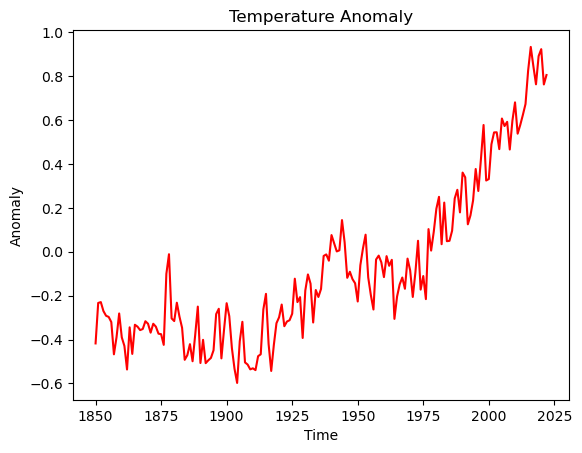

In [123]:
#1.2
df = df.rename(columns = {"Anomaly (deg C)": "Anomaly"})
plt.plot(df.Time, df.Anomaly, color="red")
plt.xlabel("Time")
plt.ylabel("Anomaly")
plt.title("Temperature Anomaly")
plt.show()

Before the time around 1975, the temperature anomaly is fluctuant. After that time, although it is still fluctuant, the trend is stably increasing.

In [124]:
#1.1
baseline = df.Anomaly[(df.Time >= 1850) & 
           (df.Time <= 1900)].mean()

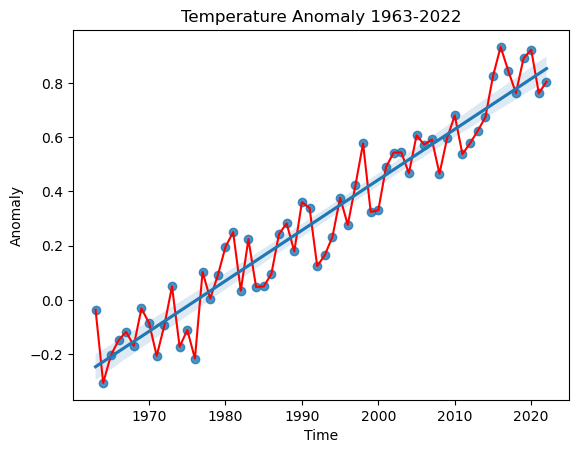

In [125]:
#1.2
import seaborn as sns
recent_df = df[df.Time >= 1963]
plt.plot(recent_df.Time, recent_df.Anomaly, color="red")
plt.xlabel("Time")
plt.ylabel("Anomaly")
plt.title("Temperature Anomaly 1963-2022")
sns.regplot(x = "Time",
            y = "Anomaly",
            data = recent_df)
plt.show()

The plot is showing that the temp anomaly is in a fairly constant upward trend, and this regression line describe the trend pretty well.

In [126]:
#1.3
df['NormalizedAnomaly'] = df['Anomaly'] - baseline
df = df[df.Time >= 1963]
df.head()

,Time,Anomaly,Lower confidence limit (2.5%),Upper confidence limit (97.5%),NormalizedAnomaly
113,1963,-0.036806,-0.090570,0.016958,0.319696
114,1964,-0.305867,-0.349492,-0.262241,0.050635
115,1965,-0.204388,-0.253574,-0.155202,0.152114
116,1966,-0.148885,-0.198392,-0.099377,0.207618
117,1967,-0.117516,-0.160625,-0.074408,0.238986


In [127]:
# 1.4
import statsmodels.formula.api as smf
df['Time'] = df['Time'] - 2000
m = smf.ols("NormalizedAnomaly ~ Time", data=df).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:      NormalizedAnomaly   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     665.3
Date:                Sun, 07 May 2023   Prob (F-statistic):           1.80e-33
Time:                        22:33:32   Log-Likelihood:                 55.935
No. Observations:                  60   AIC:                            -107.9
Df Residuals:                      58   BIC:                            -103.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7996      0.014     58.663      0.0

R-squared is 0.920, which tells me about how the regression line fits the actual data. While 0.920 is not a very reliable value (less than 0.95), but it can be sufficient for us to understand the data.

#### 1.5
The slope means there is a magnitude of 0.0186 prediced to increase for anomaly while year increased by one. Also meaning the anomaly is increasing. It is statistically significant with small p value. 

#### 1.6
The intercept is 0.7996, which means when 2000, the anomaly is predicted to be 0.7996. It is statistically significant with small p value.

In [138]:
#1.7
baseLine2022 = 0.7996 + 22 * 0.0186
print(baseLine2022)

1.2087999999999999


In [139]:
#1.8
hit15 = (1.5 - 0.7996) // 0.0186
hit20 = (2 - 0.7996) // 0.0186
print(hit15 + 2000, hit20 + 2000)

2037.0 2064.0


#### 1.9
The threashold might comes ealier. We only used the data that is after 1963, however, the data before 1963 is relative lower and constant. The time after 1963, with something changed in the society, it started to increase in a higher trend. This means in the future, the rate of increasing (acceleration of the increasing), can be higher than the slope and higher than our expectation, leading to the year to hit 1.5 and 2.0 comes earlier.


In [130]:
#2.1
b_df = pd.read_csv('/Users/yanjiarui/desktop/INFO370/harden-21-22.csv.bz2')
print(len(b_df), b_df.columns)
b_df.head()

83 Index(['Rk', 'G', 'Date', 'Age', 'Tm', 'Unnamed: 5', 'Opp', 'Unnamed: 7', 'GS',
       'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'GmSc', '+/-'],
      dtype='object')


,Rk,G,Date,Age,Tm,Unnamed: 5,Opp,Unnamed: 7,GS,MP,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-
0,1,1.0,2021-10-19,32-054,BRK,@,MIL,L (-23),1,30:38,...,5,8,8,1,2,4,3,20,17.6,-20
1,2,2.0,2021-10-22,32-057,BRK,@,PHI,W (+5),1,38:25,...,6,7,8,2,0,5,0,20,15.6,-1
2,3,3.0,2021-10-24,32-059,BRK,NaN,CHO,L (-16),1,33:09,...,5,7,8,1,1,8,5,15,6.4,-15
3,4,4.0,2021-10-25,32-060,BRK,NaN,WAS,W (+14),1,30:25,...,5,6,9,1,1,2,1,14,11.9,+6
4,5,5.0,2021-10-27,32-062,BRK,NaN,MIA,L (-13),1,35:36,...,7,7,7,1,1,4,3,14,10.7,-12


In [140]:
#2.2
play = b_df[b_df.GS == "1"]
print(len(play))

65


In [141]:
#2.3
clean_df = b_df[b_df.GS == "1"]
clean_df = clean_df.apply(pd.to_numeric, errors='ignore')

37.8 1.1 19.61384615384615 8.168944511861358


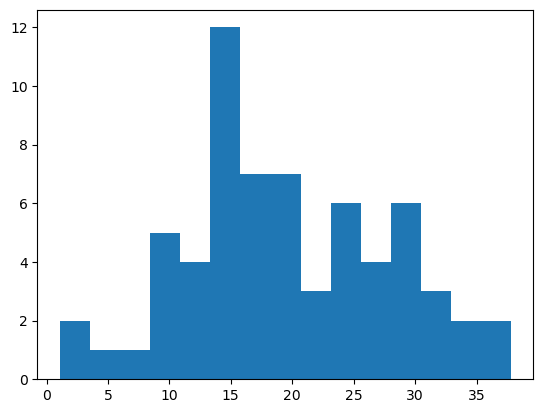

In [142]:
#2.4
maxG = clean_df.GmSc.max()
minG = clean_df.GmSc.min()
meanG = clean_df.GmSc.mean()
devG = np.std(clean_df.GmSc)
print(maxG, minG, meanG, devG)
plt.hist(clean_df.GmSc, bins=15)
plt.show()

It might be following a unimodal distribution.

In [134]:
#2.5
fgaToGm = smf.ols("GmSc ~ FGA", data=clean_df).fit()
fgaToGm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   GmSc   R-squared:                       0.133
Model:                            OLS   Adj. R-squared:                  0.119
Method:                 Least Squares   F-statistic:                     9.678
Date:                Sun, 07 May 2023   Prob (F-statistic):            0.00280
Time:                        22:33:34   Log-Likelihood:                -224.11
No. Observations:                  65   AIC:                             452.2
Df Residuals:                      63   BIC:                             456.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.8748      3.582      2.477      0.016       1.716      16.034
FGA            0.7037      0.226      3.111      0.003       0.252       1.156
==============================================================================
Omnibus:                        0.246   Durbin-Watson:                   1.902
Prob(Omnibus):                  0.884   Jarque-Bera (JB):                0.198
Skew:                          -0.127   Prob(JB):                        0.906
Kurtosis:                       2.905   Cond. No.                         59.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We can see that 8.8748 GmSc is the intercept, the predicted value when FGA is equals to zero.
There is a magnitude of 0.7037 prediced to increase for GmSc while FGA increased by one. It is statistically significant with p value less than 0.05.

In [135]:
#2.6
fgnfgaToGm = smf.ols("GmSc ~ FG + FGA", data=clean_df).fit()
fgnfgaToGm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   GmSc   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.581
Method:                 Least Squares   F-statistic:                     45.30
Date:                Sun, 07 May 2023   Prob (F-statistic):           7.49e-13
Time:                        22:33:34   Log-Likelihood:                -199.48
No. Observations:                  65   AIC:                             405.0
Df Residuals:                      62   BIC:                             411.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.9917      2.472      3.637      0.001       4.049      13.934
FG             3.0427      0.363      8.383      0.000       2.317       3.768
FGA           -0.5523      0.216     -2.553      0.013      -0.985      -0.120
==============================================================================
Omnibus:                        0.422   Durbin-Watson:                   1.943
Prob(Omnibus):                  0.810   Jarque-Bera (JB):                0.069
Skew:                          -0.025   Prob(JB):                        0.966
Kurtosis:                       3.151   Cond. No.                         64.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

There is a magnitude of 3.0427 prediced to increase for GmSc while FG increased by one. It is statistically significant with small p value.
There is a magnitude of -0.5523 prediced to increase for GmSc while FGA increased by one. It is statistically significant with small p value.
Model 1 means more FGA, higher GmSc. While model 2 means when we take considerations for FG, if we keep FG the same, the more FGA will leads to less score, because more FGA with same FG means the precision is lower, leading to low final GmSc.
The r square is 0.594, significantly higher than model 1, which means the prediction of this model can be more reliable than model 1, with more parameters inputted in the model.

In [136]:
#2.7
allToGm = smf.ols("GmSc ~ FG + FGA + Q('3P') + Q('3PA') + FT + FTA + ORB + DRB + AST"
                  "+ STL + BLK + TOV + PF", data=clean_df).fit()
allToGm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   GmSc   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.219e+30
Date:                Sun, 07 May 2023   Prob (F-statistic):               0.00
Time:                        22:33:34   Log-Likelihood:                 1997.8
No. Observations:                  65   AIC:                            -3968.
Df Residuals:                      51   BIC:                            -3937.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.066e-14   1.08e-14      0.986      0.329    -1.1e-14    3.23e-14
FG             2.4000   1.06e-15   2.27e+15      0.000       2.400       2.400
FGA           -0.7000   6.98e-16     -1e+15      0.000      -0.700      -0.700
Q('3P')        1.0000   1.81e-15   5.53e+14      0.000       1.000       1.000
Q('3PA')   -7.494e-16   1.19e-15     -0.631      0.531   -3.14e-15    1.64e-15
FT             1.4000   2.02e-15   6.94e+14      0.000       1.400       1.400
FTA           -0.4000   1.66e-15   -2.4e+14      0.000      -0.400      -0.400
ORB            0.7000   1.52e-15   4.61e+14      0.000       0.700       0.700
DRB            0.3000   7.16e-16   4.19e+14      0.000       0.300       0.300
AST            0.7000   5.76e-16   1.21e+15      0.000       0.700       0.700
STL            1.0000   1.64e-15   6.09e+14      0.000       1.000       1.000
BLK            0.7000   2.31e-15   3.02e+14      0.000       0.700       0.700
TOV           -1.0000    9.7e-16  -1.03e+15      0.000      -1.000      -1.000
PF            -0.4000   1.27e-15  -3.14e+14      0.000      -0.400      -0.400
==============================================================================
Omnibus:                        6.930   Durbin-Watson:                   1.868
Prob(Omnibus):                  0.031   Jarque-Bera (JB):                6.127
Skew:                          -0.702   Prob(JB):                       0.0467
Kurtosis:                       3.540   Cond. No.                         182.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Std is pretty small and t is pretty large. Small std means the results are precise and in low error, large t value means the samples are different, and we are confident for our results.
The r squared is 1, which is a really high score, which means it can be really reliable when making prediction with all of the parameters.
Since the coef for TOV is -1, it can be a bad thing for the team to make scores.

#### 2.8
I think the formula online is similar to this model. Most of the coefficient are close and same.

#### 3.1
The coef for having a partner is -0.47, which means who are have a partner have a better mental health. This is not statistically significant, p value is 0.15 higher than 0.05. 

#### 3.2
The coef for covid exposure is 0.24, which means who have covid exposure have a worse mental health. This is not statistically significant, p value is 0.129 higher than 0.05. 

#### 3.3
The coef for financial distress is 2.23, which means who have financial distress tend to have a worse mental health. This is statistically significant, p value is 0.001.